In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import cmath

In [69]:
def lambda_plus(w, v, z):
    B=2/v**2
    A=1-1j*w/v
    y=((1-(B*z**2)/A**2-z*B*(z**2-A/B)*(-2*special.dawsn(z))/A**2))-np.pi*1j*z*B*(z**2-A/B)*np.exp(-z**2)/(np.sqrt(np.pi)*A**2)
    return y
y = np.vectorize(lambda_plus)

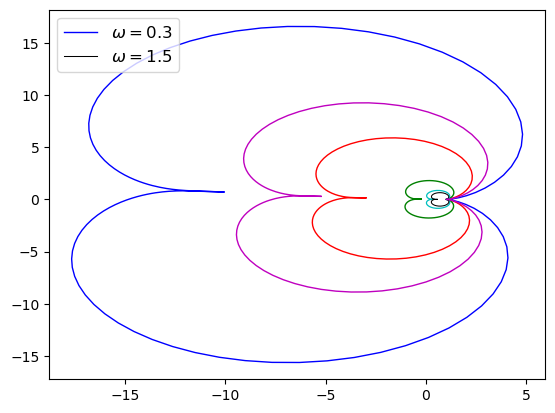

In [70]:
w=0.5
v=0.01
z=np.linspace(-500,500, 20000)
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='red',lw=1)


w=0.3
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='blue',lw=1, label=r'$\omega=0.3$')

w=0.9
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='g',lw=1)


w=1.3
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='c',lw=0.9)


w=1.5
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='k',lw=0.75, label=r'$\omega=1.5$')


w=0.4
y=lambda_plus(w, v, z)
plt.plot(y.real,y.imag,color='m',lw=1)


plt.legend(loc=2, prop={'size':12})
ax = plt.gca()

plt.show()

In [2]:
def lambda_plus_4(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*(-2*special.dawsn(z))+np.pi*1j*z*(b_1+b_3*z**2+b_5*z**4)*np.exp(-z**2)/np.sqrt(np.pi)

def lambda_minus_4(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*(-2*special.dawsn(z))-np.pi*1j*z*(b_1+b_3*z**2+b_5*z**4)*np.exp(-z**2)/np.sqrt(np.pi)


def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)

I = np.vectorize(Cauchy)


def lambda_z(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*I(z)


lambda_plus_4= np.vectorize(lambda_plus_4)
lambda_minus_4= np.vectorize(lambda_minus_4)
lambda_z=np.vectorize(lambda_z)


c:\Users\tanya\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


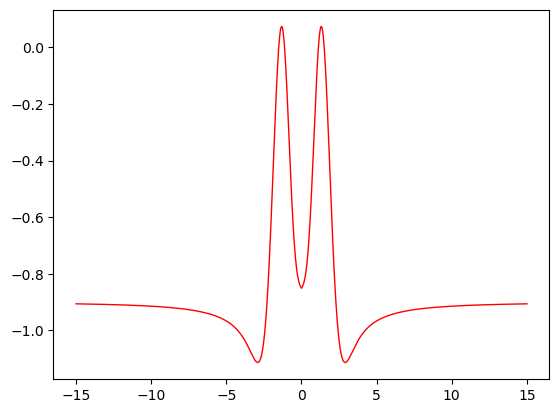

In [144]:
z=np.linspace(0, 15, 2000)-0.36016619j
y=lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z).real
plt.plot(z,y,color='red',lw=1)

z=np.linspace(-15, 0, 2000)+0.36016619j
y=lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z).real
plt.plot(z,y,color='red',lw=1)

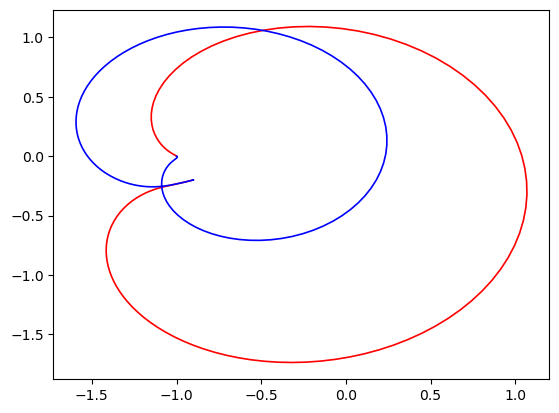

In [14]:
z=np.linspace(-500, 0, 20000)
y=lambda_plus_4(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z)

plt.plot(y.real,y.imag,color='red',lw=1.2)

z=np.linspace(0, 500, 20000)
y=lambda_plus_4(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z)

plt.plot(y.real,y.imag,color='b',lw=1.2)

plt.show()


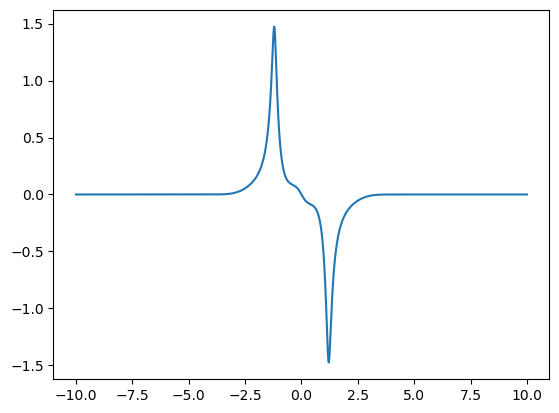

In [ ]:
def y(a_0, b_1, b_3, b_5, t):
    return (cmath.log((((t+1j)/(t-1j))**4)*lambda_plus_4(a_0, b_1, b_3, b_5, t)/lambda_minus_4(a_0, b_1, b_3, b_5, t)))
y=np.vectorize(y)
x=np.linspace(-10, 10,  1000)
plt.plot(x, y(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  x).imag)
plt.show()

In [209]:
def Gamma(a_0, b_1, b_3, b_5, z):
    s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s-z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]

    s=s+integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]

    
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)
gamma(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  1+2j)

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=s-z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


array(0.89327548+0.19599419j)

In [76]:
#z=np.linspace(0, 25, 200)+1j
#y=gamma(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z).real
#plt.plot(z,y,color='red',lw=1)

#z=np.linspace(-15, 0, 100)-1j
#y=gamma(-1, -0.1-0.1j, -3+0.3j, 2+0.2j,  z).real
#plt.plot(z.real,y,color='red',lw=1)

In [194]:
def F(a_0, b_1, b_3, b_5, z):
    lambda_inf=a_0-b_1-b_3/2-3*b_5/4
    return (lambda_z(a_0, b_1, b_3, b_5, z)*(z+1j)**4)/(lambda_inf*np.exp(gamma(a_0, b_1, b_3, b_5, z)))

In [195]:
def root(a_0, b_1, b_3, b_5, a, b):
    u=(F(a_0, b_1, b_3, b_5, a)*b**2-F(a_0, b_1, b_3, b_5, b)*a**2)/(b**2-a**2)+(a**2)*b**2
    v=(F(a_0, b_1, b_3, b_5, a)-F(a_0, b_1, b_3, b_5, b))/(b**2-a**2)+b**2+a**2
    z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
    z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)
    return z_1, z_2

In [196]:
z1,z2=root(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1j, 2j)
print(z1, z2)

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


(1.221880354403183-0.1809500442071864j) (0.8968153636553753-0.09934142130900138j)


In [197]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z2)

(-0.03206279089142572+0.7306834608499364j)

In [198]:
A = np.array([[1, 1], [1, 9]])
b = np.array([F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1j)-1,F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 3j)-81])
u,v=np.linalg.solve(A, b)
z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


In [199]:
A = np.array([[1, 4], [1, 3]])
b = np.array([F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 2j)-16,F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, np.sqrt(3)*1j)-9])
u,v=np.linalg.solve(A, b)
z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


In [200]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z_2)

(0.08733949680733932+0.6026217685211297j)

Попытки уточнений

In [201]:
def Cauchy2(z):
    s=integrate.quad(lambda x: (x**2+z.real**2-z.imag**2-2*x*z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2)**2, -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
J=np.vectorize(Cauchy2)
def Cauchy1(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
I = np.vectorize(Cauchy1)
def lambda_z(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return a_0+a_2*z**2+a_4*z**4+z*(b_1+b_3*z**2+b_5*z**4)*I(z)
def dlambda_dz(a_0, b_1, b_3, b_5, z):
    a_2=b_3+b_5/2
    a_4=b_5
    return 2*a_2*z+4*a_4*z**3+(b_1+3*b_3*z**2+5*b_5*z**4)*I(z)+z*(b_1+b_3*z**2+b_5*z**4)*J(z)

In [202]:
def root(a_0, b_1, b_3, b_5, x1):
   eps=1e-10
   x2=0
   while abs(x1-x2)>eps:
      s=x1-lambda_z(a_0, b_1, b_3, b_5, x1)/dlambda_dz(a_0, b_1, b_3, b_5, x1)
      x2=x1
      x1=s
   return x1
root=np.vectorize(root)

In [203]:
r=root(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z_2)
r
#F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, r)

array(1.12565889-0.36016619j)

In [204]:
R=cmath.sqrt(-4-F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 2j)/(-4-r**2))
R

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=1j*integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).imag/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


(1.028875508881411+0.09473341688285614j)

In [205]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, r)

(-2.220446049250313e-16-6.661338147750939e-16j)

In [179]:
def coeff_F(a_0, b_1, b_3, b_5, z):
    A = np.vander(z)
    b = np.array([F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z[0]), F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z[1]), F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z[2]), F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z[3]), F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z[4])])
    return np.linalg.solve(A, b)

In [180]:
z=[10j+1,2j+2,9j+10,5j-10,5j-4]
f=coeff_F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z)
f

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=s+1j*z.imag*integrate.quad(lambda x: y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]


array([  0.99811864+1.83353461e-03j,  -3.93957002+4.05710498e+00j,
         4.57218152-1.07697819e+01j, -24.48176978+2.56708171e+00j,
        25.03864582+2.16506088e+01j])

In [181]:
u,v=f[4],-f[2]
z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)
print(z_1,z_2)

(1.2463592329909272-0.8958247481478722j) (2.088914529368693+3.112339118188421j)


In [182]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, z_1)

(-0.43616843464611854-0.24984701770597484j)

In [183]:
import sympy as sy
kor = sy.Symbol('kor')
h = sy.solvers.solve(f[0]*kor**4 + f[1]*kor**3 + f[2]*kor**2 + f[3]*kor + f[4], kor)
h

[-0.838321780305677 + 1.1746458152051*I,
 0.129568502603568 - 4.52499996281264*I,
 1.27285307520847 + 0.588023993437333*I,
 3.37541572268849 - 1.30965893464674*I]

In [186]:
F(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1.27285307520847 + 0.588023993437333*1j)

C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s=s+integrate.quad(lambda x: (x-z.real)*y(a_0, b_1, b_3, b_5, x).real/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
C:\Users\tanya\AppData\Local\Temp\ipykernel_12520\1160020124.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discont

(-1.1337771064503046-9.602749990408173j)

In [136]:
r

array(1.12565889-0.36016619j)

In [188]:
r=root(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1.27285307520847 + 0.588023993437333*1j)
r

array(1.12565889-0.36016619j)

In [189]:
dlambda_dz(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, r)

(0.7366450621287962-1.3960136670373537j)

In [191]:
lambda_z(-1, -0.1-0.1j, -3+0.3j, 2+0.2j, 1.27285307520847 + 0.588023993437333**1j)
        

(-0.7157219752129187-0.8059562605646953j)